# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
#print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [5]:
boston['feature_names']
boston_cat_names = ['Índice de criminalidad', 'Proporción de zonas residenciales', 'Proporción de zonas industriales',
                    'Límite con el río Charles', 'Concentración de óxidos nítricos',
                    'promedio del número de habitaciones por propiedad', 'proporción de propiedades construídas antes de 1940',
                    'Distancia ponderada a cinco centros de empleo de Boston', 'Índice de accesibilidad a carreteras radiales',
                    'Valor del impuesto a la propiedad por cada $10000', 'Relación alumno-profesor por localidad',
                    'Proporción de gente de raza negra', 'Porcentaje de población de bajos recursos']

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [6]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:


1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**1**. El conjunto de datos contiene información a cerca de diferentes características de 506 casas, ubicadas en Boston, contenida en 13 variables. 

2. La variable objetivo a predecir es un vector de longitud = 506 que corresponde al valor de cada una de las casas.

3. Se encuentran disponibles 13 atributos para realizar la predicción, los cuáles se describen a continuación:
- CRIM: tasa de crímenes per cápita por ciudad.
- ZN: proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados.
- INDUS: proporción de acres industriales no minoristas por ciudad.
- CHAS: variable que indica si la casa limita o no con el rio Charles
- NOX: concentración de óxidos nitricos en partes por millón.
- RM: número promedio de habitaciones por vivienda.
- AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
- DIS: distancias ponderadas a cinco centros de empleo de Boston.
- RAD: índice de accesibilidad a carreteras radiales.      
- TAX: tasa de impuesto a la propiedad valuada por cada 10,000 dólares.
- PTRATIO: relación alumno-profesor por localidad.
- B: proporción de negros por ciudad.
- LSTAT: porcentaje de población con status bajo.


4. Creemos que los atributos más relevantes para determinar el precio de la propiedad serán: ZN, TAX, DIS, CRIM, B, RAD y RM.

5. El atributo "**B**" plantea un dilema ético ya que considera al porcentaje de personas de piel negra como una posible influencia del valor de las casas.  
[Riesgo] Utilizar datos raciales y economicos para realizar una estimacion puede aumentar la segregacion de las ciudades

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

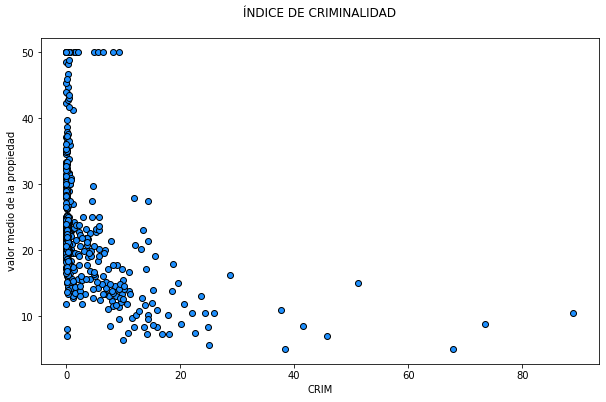

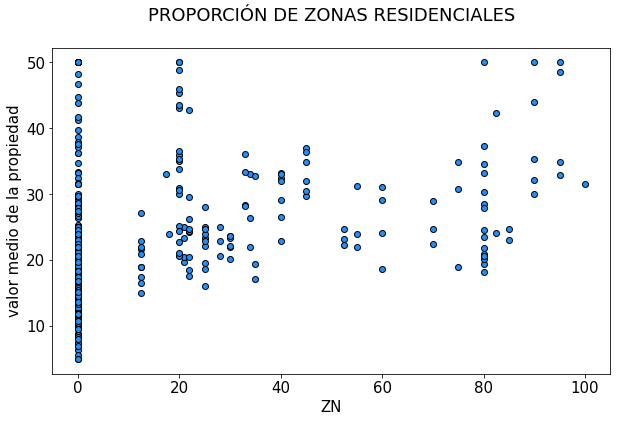

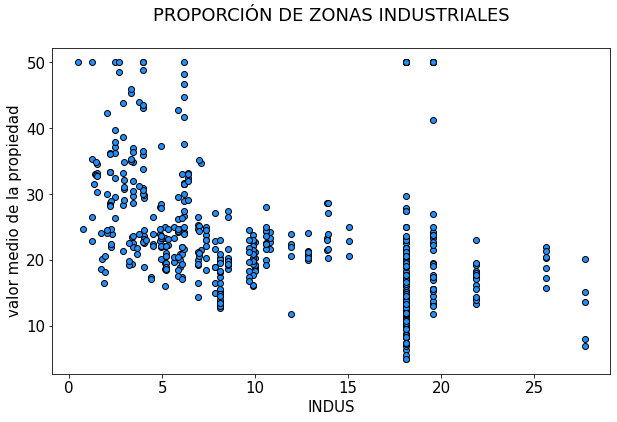

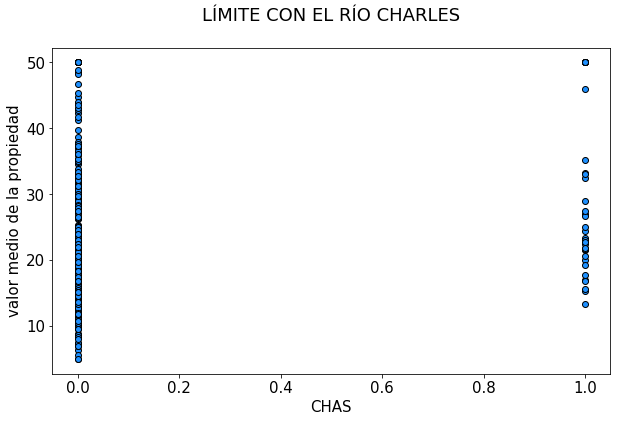

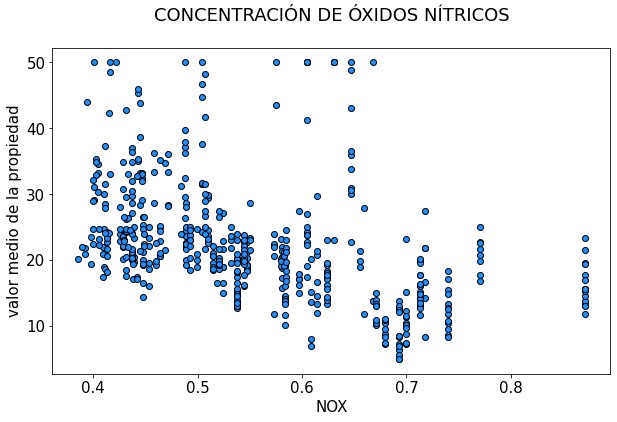

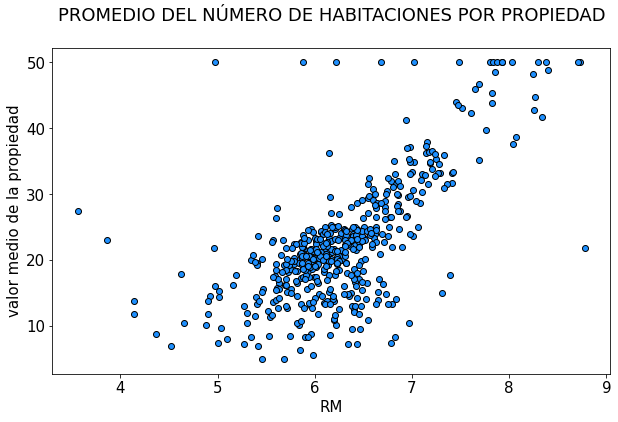

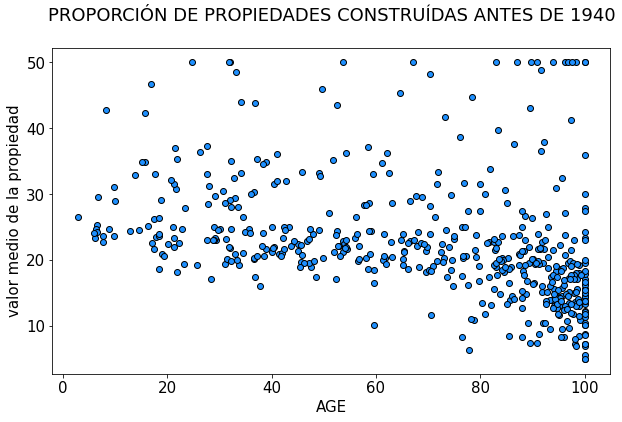

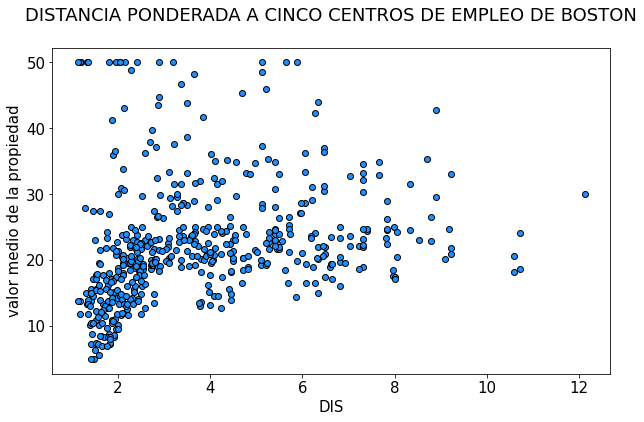

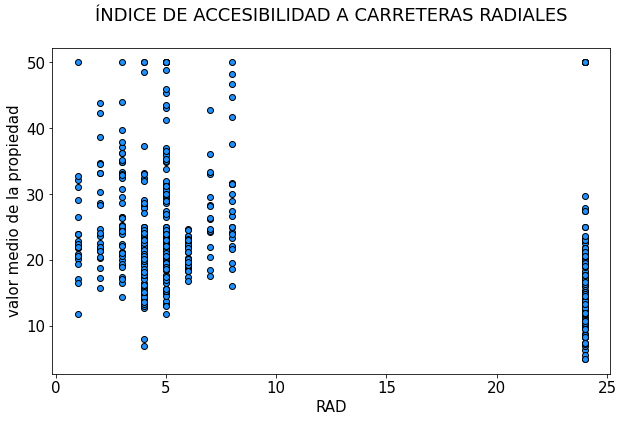

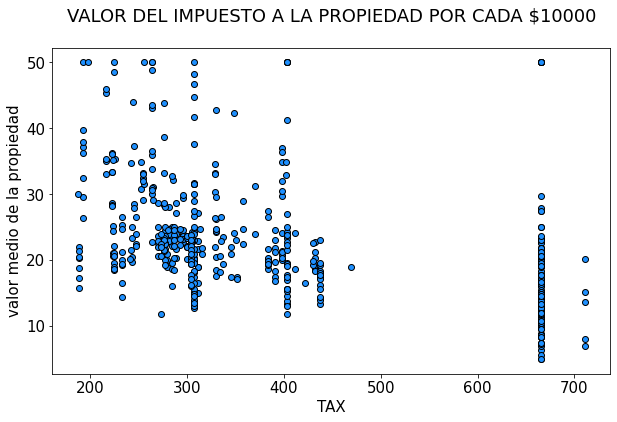

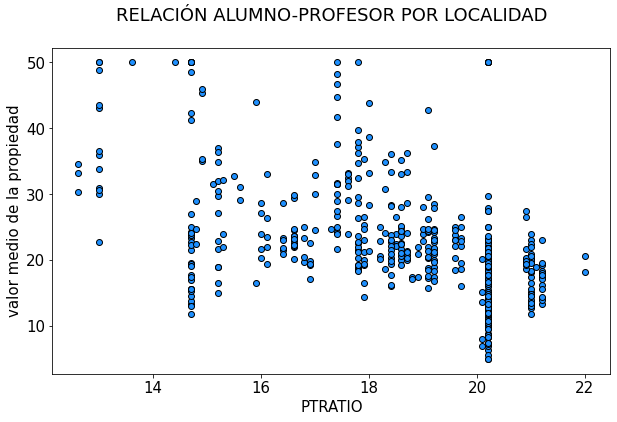

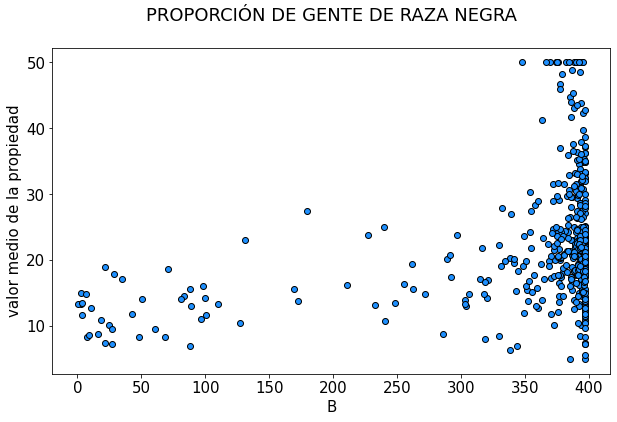

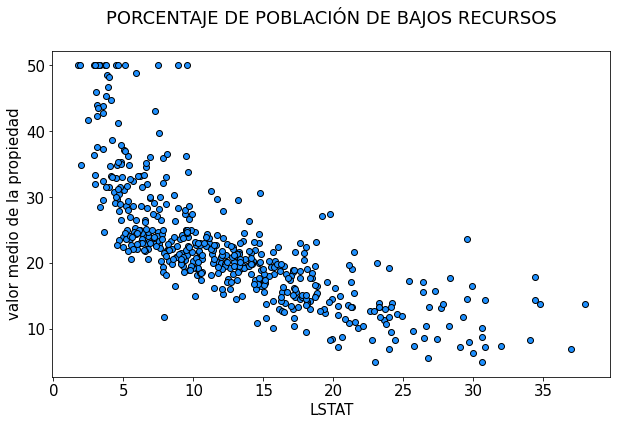

In [7]:
for i in range(len(boston.feature_names)):
  plt.figure(figsize=(10, 6))
  feature = boston.feature_names[i]
  selector = (boston['feature_names'] == feature)
  plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
  plt.title(boston_cat_names[i].upper()+'\n')
  plt.rc('font', size=15)
  plt.xlabel(feature)
  plt.ylabel('valor medio de la propiedad')
  plt.show()

In [8]:
# Orden de importancia según la tasa de correlación: LSTAT(-1) RM PTRATIO(-1) INDUS(-) TAX(-); ver otras la lista de correlaciones entre target y las otras variables
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
df['target'] = boston['target']
df_cor = df.corr()
cor= df_cor['target'] # Ranking LSTAT(-), RM, PTRATIO(-), INDUS(-), TAX(-)
cor.drop('target').abs().sort_values(ascending=False).round(2)

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
RAD        0.38
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: target, dtype: float64

RM, LSTAT, CRIM, DIS

**Orden de importancia:**
RM: número promedio de habitaciones por vivienda.
LSTAT: porcentaje de población con status bajo.
DIS: distancias ponderadas a cinco centros de empleo de Boston.
CRIM: tasa de crímenes per cápita por ciudad.


# Uso de logaritmos

En las estimaciones las pendientes obtenidas se ven seriamente influidas por la unidad de medida de las variables involucradas. Estimadores pertinentes adimensionales pueden obtenerse a través de la aplicación de logaritmos a las variables bajo análisis. En estos casos las pendientes se llamaran elasticidades e indicaran en cuanto crece (o decrece) la variable dependiente cuando cambia la variable explicativa en un 1%. En los casos de variables independientes con valores menores no se aplica logaritmo a las mismas, y los estimadores correspondientes, se llaman semi-elasticides. 

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [9]:
# 1. Seleccionamos 'RM' considerando el atributo mas apropiado
feature = 'RM' 
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [10]:
# 2. Instanciar y entrenar acá.
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train_f, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# 3. Predecir y evaluar acá.
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = regr.predict(X_train_f)
y_test_pred = regr.predict(X_test_f)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')
print('Coeficiente de determinación: %.2f'
      % r2_score(y_train, y_train_pred))

Train error: 4.3e+01
Test error: 4.7e+01
Coeficiente de determinación: 0.50


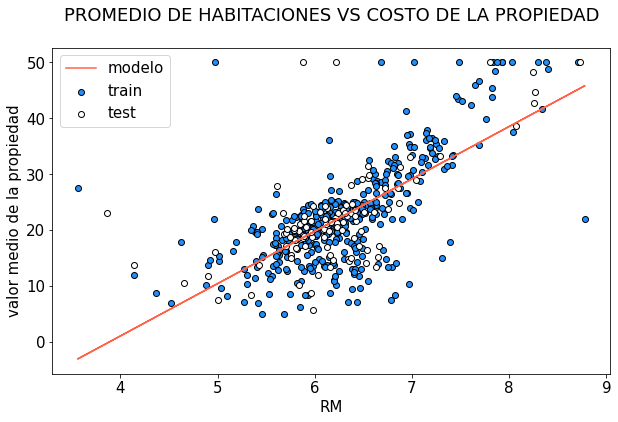

In [12]:
# 4. Graficar acá. 
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.figure(figsize=(10, 6))
plt.plot(X_train_f, y_train_pred, color="tomato", label="modelo")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title('promedio de habitaciones vs costo de la propiedad\n'.upper())
plt.rc('font', size=15)
plt.legend()
plt.xlabel(feature)
plt.ylabel('valor medio de la propiedad')
plt.show()

**5. Responder acá**

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [13]:
# 1. Resolver acá.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_error_list = []
test_error_list  = []
degrees = range(1, 10)
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(X_train_f, y_train)
    
    y_train_pred = model.predict(X_train_f)
    y_test_pred  = model.predict(X_test_f)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_error_list.append(train_error)
    test_error_list.append(test_error)

    print('Errores cuadráticos medios con la regresión lineal de grado ', degree)
    print(f'Train error: {train_error:0.2}')
    print(f'Test error: {test_error:0.2}')
    print()   

Errores cuadráticos medios con la regresión lineal de grado  1
Train error: 4.3e+01
Test error: 4.7e+01

Errores cuadráticos medios con la regresión lineal de grado  2
Train error: 3.8e+01
Test error: 4e+01

Errores cuadráticos medios con la regresión lineal de grado  3
Train error: 3.6e+01
Test error: 4e+01

Errores cuadráticos medios con la regresión lineal de grado  4
Train error: 3.5e+01
Test error: 4.2e+01

Errores cuadráticos medios con la regresión lineal de grado  5
Train error: 3.3e+01
Test error: 4.1e+01

Errores cuadráticos medios con la regresión lineal de grado  6
Train error: 3.3e+01
Test error: 4.1e+01

Errores cuadráticos medios con la regresión lineal de grado  7
Train error: 3.3e+01
Test error: 4.2e+01

Errores cuadráticos medios con la regresión lineal de grado  8
Train error: 3.3e+01
Test error: 4.2e+01

Errores cuadráticos medios con la regresión lineal de grado  9
Train error: 3.3e+01
Test error: 4.6e+01



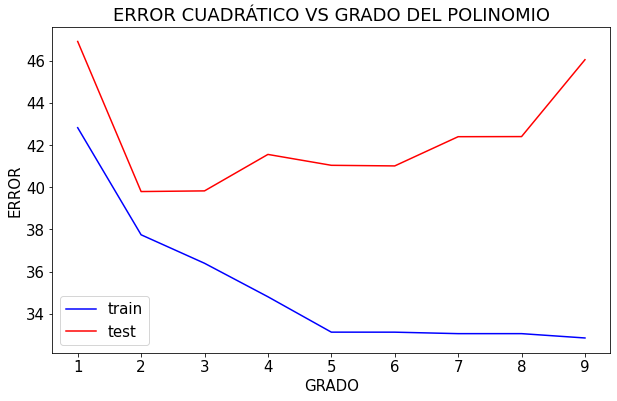

In [14]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_error_list, color="blue", label="train")
plt.plot(degrees, test_error_list, color="red", label="test")
plt.title('Error cuadrático vs grado del polinomio'.upper())
plt.rc('font', size=15)
plt.legend()
plt.xlabel('grado'.upper())
plt.ylabel('Error'.upper())
plt.show()

**3. Responder acá**

Parece que grado 2 seria el modelo optimo

Train error: 3.8e+01
Test error: 4e+01


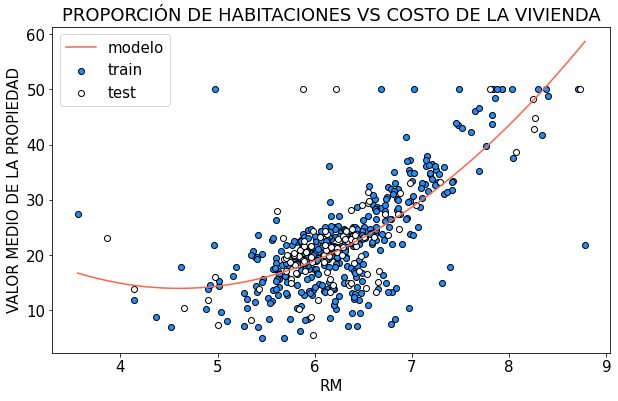

In [15]:
# 4. Reconstruir mejor modelo acá y graficar.
best_degree=2
model = make_pipeline(PolynomialFeatures(best_degree), linear_model.LinearRegression())
model.fit(X_train_f, y_train)

y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

plt.figure(figsize=(10, 6))
plt.rc('font', size=15)
#plt.plot(X_train_f, y_train_pred, color="tomato", label="modelo")
plt.plot(x, model.predict(x.reshape(-1,1)), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title('proporción de habitaciones vs costo de la vivienda'.upper())
plt.legend()
plt.xlabel(feature)
plt.ylabel('valor medio de la propiedad'.upper())
plt.show()

**5. Responder acá**

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [16]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'PTRATIO')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

Grado=  1
Train error: 2.4e+01
Test error: 4.2e+01

Grado=  2
Train error: 1.4e+01
Test error: 3e+01

Grado=  3
Train error: 1.3e+01
Test error: 3.1e+01

Grado=  4
Train error: 9.5
Test error: 3.8e+01

Grado=  5
Train error: 8.2
Test error: 3.2e+01

Grado=  6
Train error: 7.2
Test error: 8e+01

Grado=  7
Train error: 6.6
Test error: 2.3e+03

Grado=  8
Train error: 7.1
Test error: 7.7e+03

Grado=  9
Train error: 6.4
Test error: 1e+04



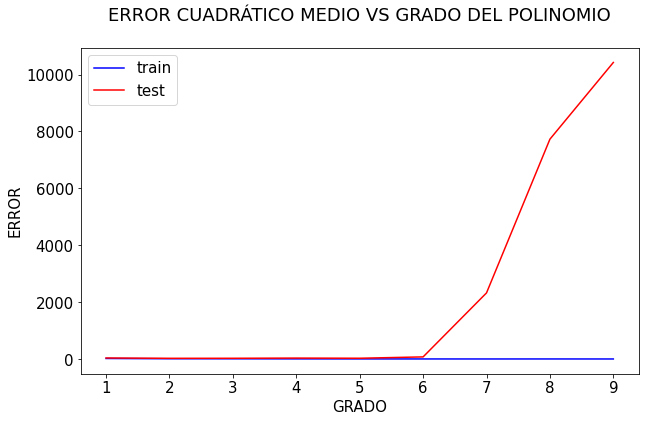

In [17]:
# 2. Resolver acá.
train_error_list = []
test_error_list = []
degrees = range(1, 10)
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    print("Grado= ", degree)
    model.fit(X_train_fs, y_train)
    
    y_train_pred = model.predict(X_train_fs)
    y_test_pred  = model.predict(X_test_fs)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error  = mean_squared_error(y_test, y_test_pred)

    train_error_list.append(train_error)
    test_error_list.append(test_error)

    print(f'Train error: {train_error:0.2}')
    print(f'Test error: {test_error:0.2}')
    print()
# 2. Graficar curvas de error acá.
plt.figure(figsize=(10, 6))
plt.rc('font', size=15)
plt.plot(degrees, train_error_list, color="blue", label="train")
plt.plot(degrees, test_error_list, color="red", label="test")
plt.legend()
plt.title('error cuadrático medio vs grado del polinomio\n'.upper())
plt.xlabel('grado'.upper())
plt.ylabel('error'.upper())
plt.show()

**3. Responder acá.**

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.


Grado=  1
Train error: 1.9e+01
Test error: 3.3e+01

Grado=  2
Train error: 6.3
Test error: 2.5e+01

Grado=  3
Train error: 2.3e-11
Test error: 1.1e+06

Grado=  4
Train error: 2.2e-19
Test error: 9.8e+05

Grado=  5
Train error: 7.2e-20
Test error: 2e+05

Grado=  6
Train error: 1.5e-20
Test error: 2e+05

Grado=  7
Train error: 1.1e-18
Test error: 2.5e+04

Grado=  8
Train error: 6e-20
Test error: 1.7e+05

Grado=  9
Train error: 1.2e-19
Test error: 5.6e+05



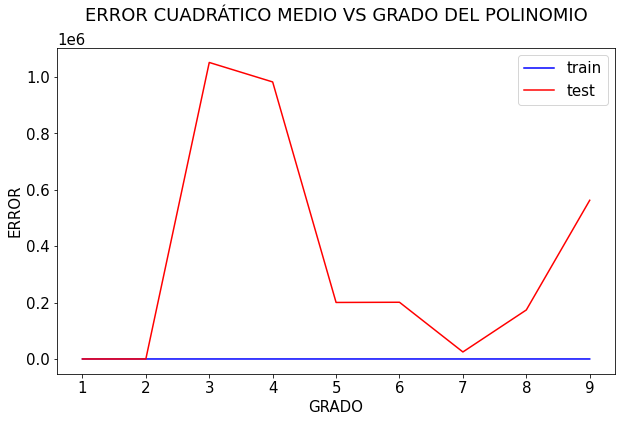

In [18]:
train_error_list = []
test_error_list = []
degrees = range(1, 10)
error_menor_sin_ridge = 10000
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    print("Grado= ", degree)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error  = mean_squared_error(y_test, y_test_pred)
    if test_error < error_menor_sin_ridge:
      error_menor_sin_ridge = test_error 

    train_error_list.append(train_error)
    test_error_list.append(test_error)

    print(f'Train error: {train_error:0.2}')
    print(f'Test error: {test_error:0.2}')
    print()
# 2. Graficar curvas de error acá.
plt.figure(figsize=(10, 6))
plt.rc('font', size=15)
plt.plot(degrees, train_error_list, color="blue", label="train")
plt.plot(degrees, test_error_list, color="red", label="test")
plt.legend()
plt.title('error cuadrático medio vs grado del polinomio\n'.upper())
plt.xlabel("grado".upper())
plt.ylabel("error".upper())
plt.show()

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

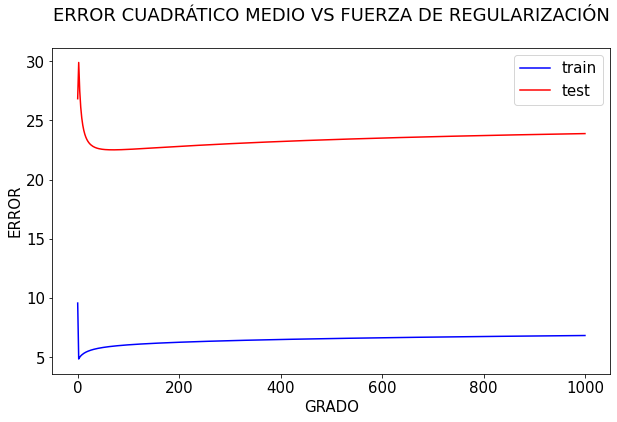

EL VALOR DE ALPHA CON MENOR ERROR DE PREDICCIÓN EN TEST ES:  70.1

EL VALOR DEL MENOR ERROR DE PREDICCIÓN OBTENIDO EN EL TEST ES:  22.5

EL VALOR DEL MENOR ERROR DE PREDICCIÓN OBTENIDO EN EL ENTRENAMIENTO ES:  5.9

PORCENTAJE DE DISMINUCIÓN DEL ERROR CON LA REGULARIZACIÓN:  10.7 %


In [19]:
from sklearn.linear_model import Ridge

train_error_list = []
test_error_list = []
degree = 2
alpha_range = np.linspace(0, 1000, 500)
error_menor_con_ridge = 10000
train_error_menor = 10000
alpha_menor = 10000

for alpha in alpha_range:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    if test_error < error_menor_con_ridge:
      error_menor_con_ridge = test_error 
      train_error_menor = train_error 
      alpha_menor = alpha

    train_error_list.append(train_error)
    test_error_list.append(test_error)

# 2. Graficar curvas de error acá.
plt.figure(figsize=(10, 6))
plt.rc('font', size=15)
plt.plot(alpha_range, train_error_list, color="blue", label="train")
plt.plot(alpha_range, test_error_list, color="red", label="test")
plt.legend()
plt.xlabel('grado'.upper())
plt.ylabel('error'.upper())
plt.title('error cuadrático medio vs fuerza de regularización\n'.upper())
plt.show()
print('el valor de alpha con menor error de predicción en test es: '.upper(), alpha_menor. round(1))
print()
print('el valor del menor error de predicción obtenido en el test es: '.upper(), error_menor_con_ridge.round(1))
print()
print('el valor del menor error de predicción obtenido en el entrenamiento es: '.upper(), train_error_menor.round(1))
print()
print('Porcentaje de disminución del error con la regularización: '.upper(), (100 - (error_menor_con_ridge/error_menor_sin_ridge)*100).round(1), '%')

A partir de la regularización se disminuye el error cuadrático medio en un 10%

